In [1]:
# Importing the libraries
import cifar10
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [2]:
cifar10.data_path = "data/CIFAR-10/"

In [3]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [4]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [6]:
print(images_train.shape)
print(cls_train.shape)
print(labels_train.shape)

(50000, 32, 32, 3)
(50000,)
(50000, 10)


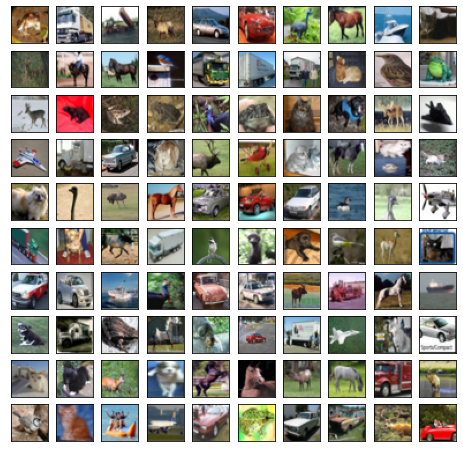

In [7]:
# Plotting the original images
fig = plt.figure(figsize = (8,8))
for i in range(100):
    ax = fig.add_subplot(10,10,i+1,xticks = [], yticks = [])
    ax.imshow(images_train[i])
plt.show()

#### In order to feed an image data into a CNN model, the dimension of the input tensor should be either (width x height x num_channel) 

In [8]:
# reshaping the images before fitting 
images_train_reshaped = images_train.reshape((50000,32*32*3))
images_train_reshaped.shape

(50000, 3072)

In [9]:
# creating PCA Object and fitting the reshaped images
pca = PCA()
pca.fit(images_train_reshaped)

PCA()

In [10]:
# deciding k features to maintain 99 percent variance 
k = 0
current_variance = 0
total = sum(pca.explained_variance_)
while current_variance/total < 0.99:
    current_variance += pca.explained_variance_[k]
    k = k + 1
k

658

In [11]:
# fitting the data with k components
pca = PCA(n_components = k, whiten = True)
images_train_reshaped = pca.fit_transform(images_train_reshaped)
images_train_reshaped.shape

(50000, 658)

In [12]:
# reversing the process to assess that the images are intact or not
images_train_approx = pca.inverse_transform(images_train_reshaped)
images_train_approx = images_train_approx.reshape((50000,32,32,3))
images_train_approx.shape

(50000, 32, 32, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

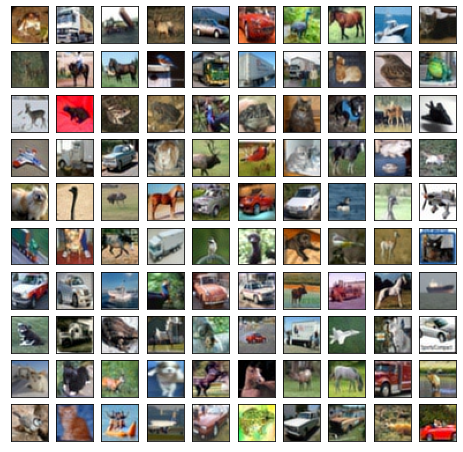

In [13]:
# plotting the images after loosing information
fig = plt.figure(figsize = (8,8))
for i in range(100):
    ax = fig.add_subplot(10, 10, i+1, xticks = [], yticks = [])
    ax.imshow(images_train_approx[i])
plt.show()

#### test data

In [14]:
# reshaping the testing data
images_test_reshaped = images_test.reshape((10000,32*32*3))
images_test_reshaped.shape

(10000, 3072)

In [15]:
images_test_transformed = pca.transform(images_test_reshaped)
images_test_transformed.shape

(10000, 658)

In [17]:
# Applying Random Forest Classification
rf = RandomForestClassifier()
rf.fit(images_train_reshaped,cls_train)
cls_pred = rf.predict(images_test_transformed)
print(classification_report(cls_test,cls_pred))
print('<------------------------------------------------------------------------------------------>')
print(confusion_matrix(cls_test,cls_pred))

              precision    recall  f1-score   support

           0       0.45      0.49      0.47      1000
           1       0.39      0.47      0.43      1000
           2       0.28      0.24      0.26      1000
           3       0.25      0.22      0.24      1000
           4       0.37      0.37      0.37      1000
           5       0.31      0.29      0.30      1000
           6       0.45      0.47      0.46      1000
           7       0.39      0.32      0.35      1000
           8       0.50      0.55      0.52      1000
           9       0.42      0.45      0.43      1000

    accuracy                           0.39     10000
   macro avg       0.38      0.39      0.38     10000
weighted avg       0.38      0.39      0.38     10000

<------------------------------------------------------------------------------------------>
[[493  58  62  35  31  38  23  43 160  57]
 [ 43 467  21  36  13  42  42  49  73 214]
 [128  40 245  89 187  86  88  47  50  40]
 [ 58  73 101 223  

In [19]:
# Applying svm 
clf = SVC
grid = {'C':[1e2,1e4,1e1,5e3,1e3,5e2],
      'gamma':[1e-3,1e-2,5e-3,5e-2,1e-4,1e-5]}

svm = GridSearchCV(clf,grid,n_jobs = -1)
svm.fit(images_train_reshaped, cls_train)
print(svm.score(images_test_transformed,cls_test))

TypeError: Cannot clone object. You should provide an instance of scikit-learn estimator instead of a class.